# The Uncertainty Principle and Applications of Particle in a Box

## Motivation:

The uncertainty principle is another important outcome of treating particles using quantum mechanics.  It states that we cannot know both the position and momemtum of a quantum particle with complete certainty.  We will show how this relationship can be derived from the results of the 1D particle in a box.  Additionally, we will show how the particle in a box model can be applied to make predictions on real systems.

## Learning Goals:

After working through these notes, you will be able to:

1. Write out the mathematical relationship of the uncertainty principle
2. Describe, qualitatively, the meaning of the uncertainty princtiple
3. Use a 1D particle in a box model to estimate the electronic absorption spectrum of butadiene
4. Use a 2D particle in a box model to estimate the electronic absorption spectrum of porphoryn

## Coding Concepts:

The following coding concepts are used in this notebook:

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## The Uncertainty Principle

The uncertainty principle states that, for a quatum/wave-like particle, the momentum and the position cannot both be known with complete certainty.  Mathematically, this can be written as
\begin{equation}
\sigma_x\sigma_p \geq \frac{\hbar}{2},
\end{equation}
where $\sigma_x$ is the uncertainty in position and $\sigma_p$ is the uncertainty in momentum.  We can derive this relationship for the particle in a box.

To compute $\sigma_x$, we recognize that 
\begin{equation}
\sigma_x = \sqrt{\sigma_x^2} = \sqrt{\langle x^2\rangle - \langle x \rangle^2}
\end{equation}
Recall that (from the notes on [Particle in a Box](particle_in_a_box.ipynb)) 
\begin{align}
\langle x \rangle &= \frac{a}{2} \\
\langle x^2 \rangle &= \frac{a^2}{3} - \frac{a^2}{2\left(n\pi\right)^2} 
\end{align}
Thus,
\begin{equation}
\sigma_x = \frac{a}{2\pi n}\sqrt{\frac{\pi^2n^2}{3} -2}
\end{equation}

This equation for $\sigma_x$ quantifies the uncertainty in $x$.  This can be interpreted as the certainty one has in measuring the position of a particle in a box.  Notice that this quantity is proportional to $a$ meaning that as you increase the size of the box you increase the uncertainty in $x$.  For a free particle, or a particle not confined in a box, you would have infinite uncertainty in position.

To compute $\sigma_p$, we recognize that analagous to $\sigma_x$
\begin{equation}
\sigma_p = \sqrt{\sigma_p^2} = \sqrt{\langle p^2\rangle - \langle p \rangle^2}
\end{equation}
Again, we have estimated these in previous notes ([Particle in a Box](particle_in_a_box.ipynb)) or for an excercise and got
\begin{align}
\langle p \rangle &= 0 \\
\langle p^2 \rangle &= \frac{n^2\pi^2\hbar^2}{a^2}
\end{align}
Thus, 
\begin{equation}
\sigma_p = \frac{n\pi h}{a}
\end{equation}

Combined, these two results give that, for a particle in a 1D box
\begin{align}
\sigma_x\sigma_p &= \frac{a}{2\pi n}\sqrt{\frac{\pi^2n^2}{3} -2}\cdot \frac{n\pi \hbar}{a} \\
&= \frac{\hbar}{2} \sqrt{\frac{\pi^2n^2}{3} -2}
\end{align}

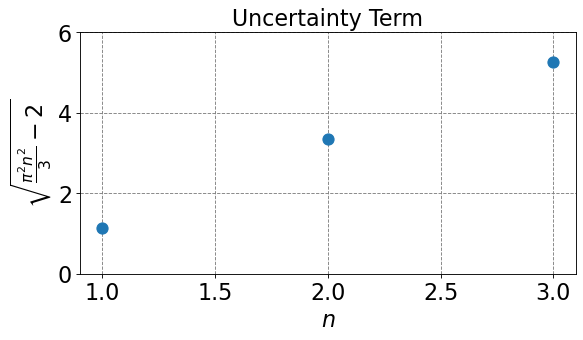

In [9]:
# plot probabilities
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def uncertainty_term(n):
    return np.sqrt(np.pi**2*n**2/3-2)
# make an array containing domain of wavelengths to consider
n = np.arange(1,4)
# setup plot parameters
fig = plt.figure(figsize=(8,4), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel(r'$n$',size=20)
ax.set_ylabel(r'$\sqrt{\frac{\pi^2n^2}{3} -2}$',size=20)
plt.tick_params(axis='both',labelsize=20)
# plot quantum result
ax.plot(n,uncertainty_term(n),'o',markersize=10)
plt.title("Uncertainty Term",fontsize=20)
plt.ylim(0,6);

We see from the plot above that square root term in the uncertainty equation cannot be less than 1, thus we have
\begin{align}
\sigma_x\sigma_p &= \frac{\hbar}{2} \sqrt{\frac{\pi^2n^2}{3} -2} \geq \frac{\hbar}{2}
\end{align}

This is the mathematical statement of the (Heisenberg) uncertainty principle.  This equation can be rearragned to state
\begin{align}
\sigma_x &\geq \frac{\hbar}{2\sigma_p} \\
\sigma_p &\geq \frac{\hbar}{2\sigma_x} 
\end{align}

These equations demonstrate the inverse relationships between the certainty in $x$ and $p$.  The more certainty one has with $x$ ($\sigma_x \rightarrow 0$) the less certainty has with $p$ ($\sigma_p \rightarrow \infty$), and vise versa.  This is only true for quatum particles.  There is no such relationship for classical particles.

## Particle in a Box: Applied

We have spent quite a bit of time discussing the particle in a 1D box problem.  The main reason for this is that it is one of the simplest problems that can be analytically solved using the Schrodinger equation.  Additionally, it highlights the differences between quantum mechanics and classical mechanics.  

There are, however, a few examples for which the particle in a box model is used to fit real experimental data.  

1. Translational motion of ideal gas particles in a finite volume.  
2. Absorption spectra of highly conjugated systems.

It is the latter example that we will consider here.

### Example: Butadiene Absorption Spectrum

Butadiene (C$_4$H$_6$) is one of the simplest conjugated molecules with.  The $\pi$ orbitals delocalize across the four carbon bonds.  The highest occupied molecular orbital (HOMO) is a $\pi$ orbital.  The lowest unoccupied moleculary orbital (LUMO) is a $\pi^*$ orbital.  When this molecule is hit with a photon of the correct energy, it will excite an electron from the HOMO to the LUMO.  This will be the lowest energy band in the electronic excitation spectrum of the molecule.  Experimentally, the lowest energy absorption band is found to be $4.61\times 10^4$ cm$^{-1}$.

Butadiene has 4 $\pi$ electrons and the motion of these electrons can be modeled as free particles confined to the single dimension of the length of the molecule.  In this model, the energy levels allowed for the electrons are given by the 1D particle in a box energy levels
\begin{equation}
E_n = \frac{h^2n^2}{8m_ea^2}
\end{equation}
The length of butadiene is approximately $a=578$ pm.  

The 4 $\pi$ electrons will occupy the first two ($n=1$ and $n=2$) states of this motion.  This is because of the Pauli exlusion principle that states that no two electrons (fermions) can occupy the same spin orbit.  Thus, the lowest energy excitation of an electron will be from the $n=2$ to the $n=3$ state.  The energy of this excitation is thus
\begin{align}
\Delta E &= \frac{h^2}{8m_ea^2}\left(3^2-2^2\right) \\
        &= \frac{5h^2}{8m_ea^2} \\
        &= \frac{5\cdot(6.626\times10^{-34} \text{ J}\cdot\text{s})^2}{8(9.109\times10^{-31}\text{ kg})(578\times10^{-12}\text{ m})^2} \\
        &= 9.02 \times10^{-19}\text{ J}
\end{align}
or 
\begin{equation}
\tilde{\nu} = \frac{\Delta E}{hc} = 4.54\times10^4\text{ cm}^{-1}
\end{equation}
This result is in reasonable agreement with the experimentally determined value of $4.61\times 10^4$ cm$^{-1}$.

In [15]:
print(5*(6.626e-34)**2/(8*9.109e-31*(578e-12)**2)," J")
print(5*(6.626e-34)/(8*9.109e-31*(578e-12)**2)/(2.99792e10)," cm^{-1}")

9.016884392420288e-19  J
45392.597024128336  cm^{-1}


### Example: Porphyrin Absorption Spectrum

A Porphyrin molecule is a planar conjugated molecule with 26$\pi$ electron.  The molecule is appoximately square with side lengths of 1000pm.  Experimentally, the lowest energy absorption band for this molecule is determined to be $\sim 17000$ cm$^{-1}$.  Show that this system can be reasonably approximated as a planar (2D) particle in a box. 

The energy levels for a 2D particle in a square box are
\begin{equation}
E_{n_x,n_y} = \frac{h^2}{8m_ea^2} \left(n_x^2 + n_y^2 \right)
\end{equation}
Each of the energy levels is denoted by an ordered pair $(n_x,n_y)$.  The lowest energy state is $(1,1)$ and the second lowest energy level is doubly degenerate with ordered pairs $(1,2)$ and $(2,1)$.  There are 26 $\pi$ electrons so the first 13 energy levels are occupied and the lowest energy excitation will be from the 13th state to the 14th state. Consider the following table

| Energy                 |   States            |
| :--------------------- | :------------------ |
| $\frac{2h^2}{8m_ea^2}$ | $1$: $(1,1)$          |
| $\frac{5h^2}{8m_ea^2}$ | $2$: $(1,2), (2,1)$   |
| $\frac{8h^2}{8m_ea^2}$ | $1$: $(2,2)$          |
| $\frac{10h^2}{8m_ea^2}$| $2$: $(1,3), (3,1)$   |
| $\frac{13h^2}{8m_ea^2}$| $2$: $(2,3), (3,2)$   |
| $\frac{15h^2}{8m_ea^2}$| $2$: $(1,4), (4,1)$   |
| $\frac{18h^2}{8m_ea^2}$| $1$: $(3,3)$  |
| $\frac{20h^2}{8m_ea^2}$| $2$: $(2,4), (4,2)$   |
| $\frac{25h^2}{8m_ea^2}$| $2$: $(3,4), (4,3)$   |
| $\frac{26h^2}{8m_ea^2}$| $2$: $(1,5), (5,1)$   |

So the lowest energy excitation will be from the $(2,4)$ or $(4,2)$ state to the $(3,4)$ or $(4,3)$ state.  This will yield an energy difference of
\begin{align}
\Delta E &= \frac{h^2}{8m_ea^2}\left(25-20\right) \\
        &= \frac{5h^2}{8m_ea^2} \\
        &= \frac{5\cdot(6.626\times10^{-34} \text{ J}\cdot\text{s})^2}{8(9.109\times10^{-31}\text{ kg})(1000\times10^{-12}\text{ m})^2} \\
        &= 3.01 \times10^{-19}\text{ J}
\end{align}
Now for the wavenumber:
\begin{equation}
\tilde{\nu} = \frac{\Delta E}{hc} = 1.52\times10^4\text{ cm}^{-1}
\end{equation}

Again, this compares reasonably well to the experimentally determined value of $1.7\times10^4$ cm$^{-1}$.

In [16]:
print(5*(6.626e-34)**2/(8*9.109e-31*(1000e-12)**2)," J")
print(5*(6.626e-34)/(8*9.109e-31*(1000e-12)**2)/(2.99792e10)," cm^{-1}")

3.0123968053573386e-19  J
15164.940384208889  cm^{-1}
